In [4]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
api_key='Your_API_Key'
channel_id='Your_channel_ID'
youtube=build('youtube','v3', developerKey=api_key)

In [6]:
def get_channel_stats(youtube, channel_id):
    request=youtube.channels().list(part='Snippet, ContentDetails, Statistics',id=channel_id)
    response=request.execute()
    return response['items']
channel_stats=get_channel_stats(youtube, channel_id)
channel_stats

[{'kind': 'youtube#channel',
  'etag': 'eSMTqewzWGCnJet5XrYcgktlCdM',
  'id': 'UCNU_lfiiWBdtULKOw6X0Dig',
  'snippet': {'title': 'Krish Naik',
   'description': "I am the cofounder of iNeuron and my experience is pioneering in machine learning, deep learning, and computer vision,an educator, and a mentor, with over 10 years' experience in the industry. This is my YouTube channel where I explain various topics on machine learning, deep learning, and AI with many real-world problem scenarios. I have delivered over 30 tech talks on data science, machine learning, and AI at various meet-ups, technical institutions, and community-arranged forums. My main aim is to make everyone familiar of ML and AI.Please subscribe and support the channel. As i love new technology, all these videos are free and I promise to make more interesting content as we go ahead.\nFor any collaboration drop me a mail at krishnaik06@gmail.com\n\nPlease free to drop a mail for Product unboxing, GPU's unboxing and any o

In [7]:
upload_id=channel_stats[0]['contentDetails']['relatedPlaylists']['uploads']
print(upload_id)
print(channel_stats[0]['statistics'])


UUNU_lfiiWBdtULKOw6X0Dig
{'viewCount': '83227141', 'subscriberCount': '826000', 'hiddenSubscriberCount': False, 'videoCount': '1730'}


In [8]:
def get_videos_list(youtube, upload_id):
    video_list=[]
    request=youtube.playlistItems().list(part='snippet,contentDetails',playlistId=upload_id,maxResults=50)
    next_page=True
    while next_page:
        response=request.execute()
        data=response['items']
        for video in data:
            video_id=video['contentDetails']['videoId']
            if video_id not in video_list:
                video_list.append(video_id)
        if 'nextPageToken' in response.keys():
            next_page=True
            request=youtube.playlistItems().list(part='snippet,contentDetails',playlistId=upload_id,maxResults=50,pageToken=response['nextPageToken'])
        else:
            next_page=False
    return video_list
video_list=get_videos_list(youtube, upload_id)
video_list

['v8yigSMQJak',
 'kFR9c3mUGgE',
 'xHwiBF0wVF8',
 'YT3GoxjXhIc',
 '86BKEv0X2xU',
 'uii05OE2kjs',
 'lDWUJiivMX8',
 '61CFTi_Cv_4',
 'vIrUK7XYgdo',
 'u6SSI1i_WDg',
 'S0VE0OEg_Mo',
 'rLfaX6JtoDg',
 'ekSduyKsiWw',
 'VNfalYYduD4',
 'lv5IEOItgWM',
 'yxwS8Z7v880',
 'c63bTKjwfaQ',
 'ogjO1evIX_c',
 'A0kDpPMXyY0',
 'Apa373mJ1mQ',
 'GxDsZ8sakOQ',
 'efpARWCsuFo',
 'lJCsVBccQgk',
 'WFLbNu-mCBc',
 'W6H20V7JQ1E',
 's0RxGFdpSjE',
 'B2scdmTZ834',
 'V7ZiWIcdu74',
 'WeR301q9wRc',
 'cgc3dSEAel0',
 'cnY6jQlJcQc',
 'i_FtfdOKa2M',
 'pUUcLQRIkIM',
 'pG7_V2MgJj0',
 'RnzC2ULvp5I',
 'PxCCzJndruQ',
 'pxk1Fr33-L4',
 'mHQPzVse2oA',
 'qdcHHrsXA48',
 'T92r0EFNslM',
 'Iq7H-RPaWMk',
 'zS1QUCvAkpE',
 'fbrPaKLGd1o',
 'kSr1dXRgcyw',
 'G56dwY2CG5w',
 'qDxCYmLWUyQ',
 'zRdzLfoTwvQ',
 'CbpsDMwFG2g',
 'Le-A72NjaWs',
 'PDoZb4HVM5k',
 'Y9mxx1Mer0I',
 'tv7rn5AsxFY',
 'rRlsspJObIU',
 '5Ghv-F1wF_0',
 't2bSApmPzU4',
 '_FpT1cwcSLg',
 '7fPvKahR4Eg',
 '2m7Pgl-84F8',
 'KZ1mWboXE6g',
 'BGlEv2CTfeg',
 'a22OPjS-4Lc',
 'OS9xRGKfx4E',
 'p1bfK8

In [9]:
def get_video_details(youtube, video_list):
    status_list=[]
    for i in range(0,len(video_list), 50):
        request=youtube.videos().list(part='Snippet, ContentDetails,Statistics', id=video_list[i:i+50])
        data=request.execute()
        for video in data['items']:
            title=video['snippet']['title']
            published=video['snippet']['publishedAt']
            tag_count=len(video['snippet'].get('tags',[]))
            view_count=video['statistics'].get('viewCount',0)
            like_count=video['statistics'].get('likeCount',0)
            dislike_count=video['statistics'].get('dislikeCount',0)
            comment_count=video['statistics'].get('commentCount',0)
            subs_count=video['statistics'].get('subscriberCount',0)

        status_dictionary=dict(Title=title,Published=published,Tags=tag_count,View=view_count,Like=like_count,Dislike=dislike_count,Comments=comment_count)
        status_list.append(status_dictionary)
    return status_list
channel_status=get_video_details(youtube, video_list)
channel_status

[{'Title': 'This Video Has Been Made By An AI With My Avatar- Future OF AI',
  'Published': '2023-06-22T13:07:44Z',
  'Tags': 6,
  'View': '16214',
  'Like': '523',
  'Dislike': 0,
  'Comments': '53'},
 {'Title': 'How Prakhar Cracked Multiple Job Offers In Data Science',
  'Published': '2023-02-20T14:24:15Z',
  'Tags': 6,
  'View': '9306',
  'Like': '265',
  'Dislike': 0,
  'Comments': '26'},
 {'Title': 'The Best Course For Data Science Starters With Neuro Lab @iNeuroniNtelligence',
  'Published': '2022-10-27T13:43:11Z',
  'Tags': 8,
  'View': '10341',
  'Like': '219',
  'Dislike': 0,
  'Comments': '52'},
 {'Title': 'Biral Video- Too Much Automation #shorts',
  'Published': '2022-08-24T05:27:12Z',
  'Tags': 0,
  'View': '43832',
  'Like': '1227',
  'Dislike': 0,
  'Comments': '22'},
 {'Title': 'Live Day 2- Bag Of Words, TF-IDF, Word2Vec NLP And Quiz-5000Inr Give Away',
  'Published': '2022-06-15T15:36:16Z',
  'Tags': 5,
  'View': '56106',
  'Like': '1704',
  'Dislike': 0,
  'Comments':

In [10]:
def total_subscribers(youtube, channel_id):
    channel_data = youtube.channels().list(part='statistics',id=channel_id).execute()
    subscriber_count =int(channel_data['items'][0]['statistics']['subscriberCount'])
    print(f'Subscriber Count: {subscriber_count}')
total_subscribers(youtube, channel_id)


Subscriber Count: 826000


In [11]:
df=pd.DataFrame(channel_status)
df.head()

,Title,Published,Tags,View,Like,Dislike,Comments
0,This Video Has Been Made By An AI With My Avat...,2023-06-22T13:07:44Z,6,16214,523,0,53
1,How Prakhar Cracked Multiple Job Offers In Dat...,2023-02-20T14:24:15Z,6,9306,265,0,26
2,The Best Course For Data Science Starters With...,2022-10-27T13:43:11Z,8,10341,219,0,52
3,Biral Video- Too Much Automation #shorts,2022-08-24T05:27:12Z,0,43832,1227,0,22
4,"Live Day 2- Bag Of Words, TF-IDF, Word2Vec NLP...",2022-06-15T15:36:16Z,5,56106,1704,0,48


In [12]:
def date_time(df):
    df['Published'] = pd.to_datetime(df['Published'])
    df['Date'] = df['Published'].dt.date
    df['Time'] = df['Published'].dt.time
    return df
df=date_time(df)

In [13]:
df.head()

,Title,Published,Tags,View,Like,Dislike,Comments,Date,Time
0,This Video Has Been Made By An AI With My Avat...,2023-06-22 13:07:44+00:00,6,16214,523,0,53,2023-06-22,13:07:44
1,How Prakhar Cracked Multiple Job Offers In Dat...,2023-02-20 14:24:15+00:00,6,9306,265,0,26,2023-02-20,14:24:15
2,The Best Course For Data Science Starters With...,2022-10-27 13:43:11+00:00,8,10341,219,0,52,2022-10-27,13:43:11
3,Biral Video- Too Much Automation #shorts,2022-08-24 05:27:12+00:00,0,43832,1227,0,22,2022-08-24,05:27:12
4,"Live Day 2- Bag Of Words, TF-IDF, Word2Vec NLP...",2022-06-15 15:36:16+00:00,5,56106,1704,0,48,2022-06-15,15:36:16


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Title      34 non-null     object             
 1   Published  34 non-null     datetime64[ns, UTC]
 2   Tags       34 non-null     int64              
 3   View       34 non-null     object             
 4   Like       34 non-null     object             
 5   Dislike    34 non-null     int64              
 6   Comments   34 non-null     object             
 7   Date       34 non-null     object             
 8   Time       34 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 2.5+ KB


In [15]:
def Dtype(df):
    df['View']=pd.to_numeric(df['View'])
    df['Like']=pd.to_numeric(df['Like'])
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['Comments']=pd.to_numeric(df['Comments'])
    df['Time'] = pd.to_datetime(df['Time'])
    df['Video Upload Hours'] = df['Time'].dt.hour
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
Dtype(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   Title               34 non-null     object             
 1   Published           34 non-null     datetime64[ns, UTC]
 2   Tags                34 non-null     int64              
 3   View                34 non-null     int64              
 4   Like                34 non-null     int64              
 5   Dislike             34 non-null     int64              
 6   Comments            34 non-null     int64              
 7   Date                34 non-null     datetime64[ns]     
 8   Time                34 non-null     datetime64[ns]     
 9   Video Upload Hours  34 non-null     int64              
 10  Month               34 non-null     int64              
 11  Year                34 non-null     int64              
dtypes: datetime64[ns, UTC](1), datetime64[

In [17]:
df['View'] = pd.to_numeric(df['View'], errors='coerce')
filelar = df.nlargest(10, "View" )[['Title','View']]
filelar

,Title,View
31,Deploy Machine Learning Model using Flask,259428
29,Statistics- What is Pearson Correlation Coeffi...,221383
26,Salary Of Data Scientist In India And US In 2020,174845
6,"Live Day 2- Discussing Ridge, Lasso And Logist...",134102
25,Tutorial 39- Gini Impurity Intuition In Depth ...,118964
32,Natural Language Processing|BagofWords,89388
13,Introduction To Machine Learning And Deep Lear...,89258
4,"Live Day 2- Bag Of Words, TF-IDF, Word2Vec NLP...",56106
20,Live-Features Selection-Various Techniques To ...,54135
30,Complete Life Cycle of a Data Science Project,50900


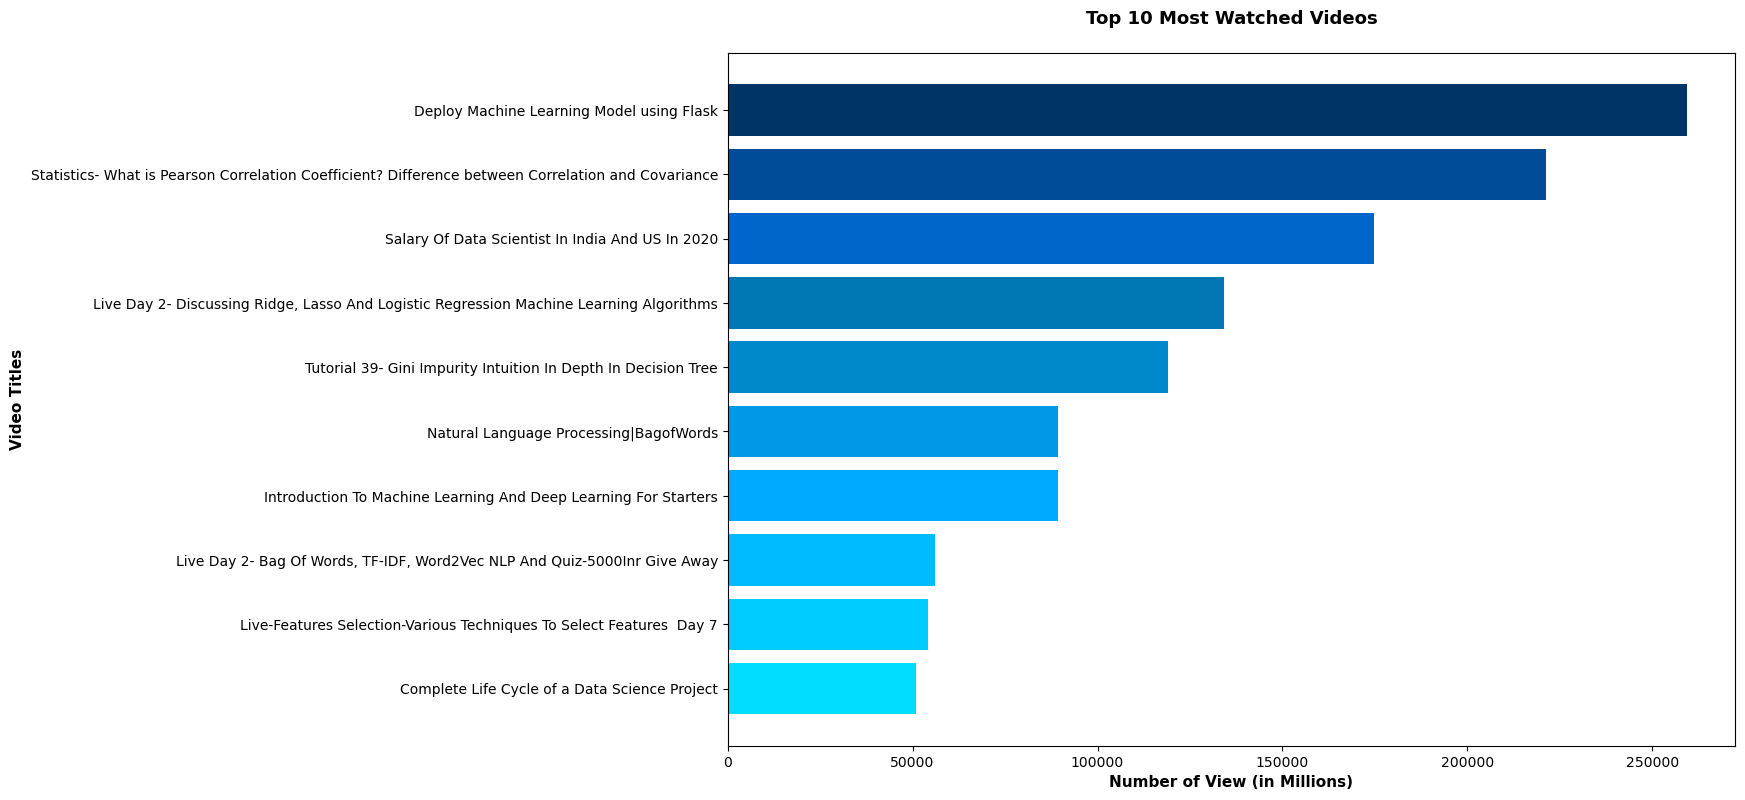

In [18]:
colors_ttmwv = ['#003366', '#004c99', '#0066cc', '#0077b3', '#0088cc','#0099e6', '#00aaff', '#00bbff', '#00ccff', '#00ddff']
plt.figure(figsize=(13, 9))
plt.barh(filelar['Title'], filelar['View'],color=colors_ttmwv)
plt.xlabel('Number of View (in Millions)',fontsize=11,fontweight='bold')
plt.ylabel('Video Titles',fontsize=11,fontweight='bold')
plt.title('Top 10 Most Watched Videos\n',fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()


In [19]:
bottom_10_least_viewed_videos = df.nsmallest(10, 'View')[['Title', 'View']]
bottom_10_least_viewed_videos

,Title,View
22,Please Help Each Other To Pass This Crisis- Mo...,2145
27,Data Science General Q&A,3536
23,Tutorial 12 PowerQuery DateTime Functions,4922
33,Maeri unplugged by Krish and band,5385
8,Complete Feature Engineering And EDA In Data S...,6417
18,Live Q&A For Aspiring Data Scientist-Ask Any ...,6516
5,Live Q&A-Ask Anything Related To Data Science,7367
28,Will AutoML Replace Data Scientist Job? Myth,9050
9,Mistakes To Avoid While Applying Data Science ...,9179
1,How Prakhar Cracked Multiple Job Offers In Dat...,9306


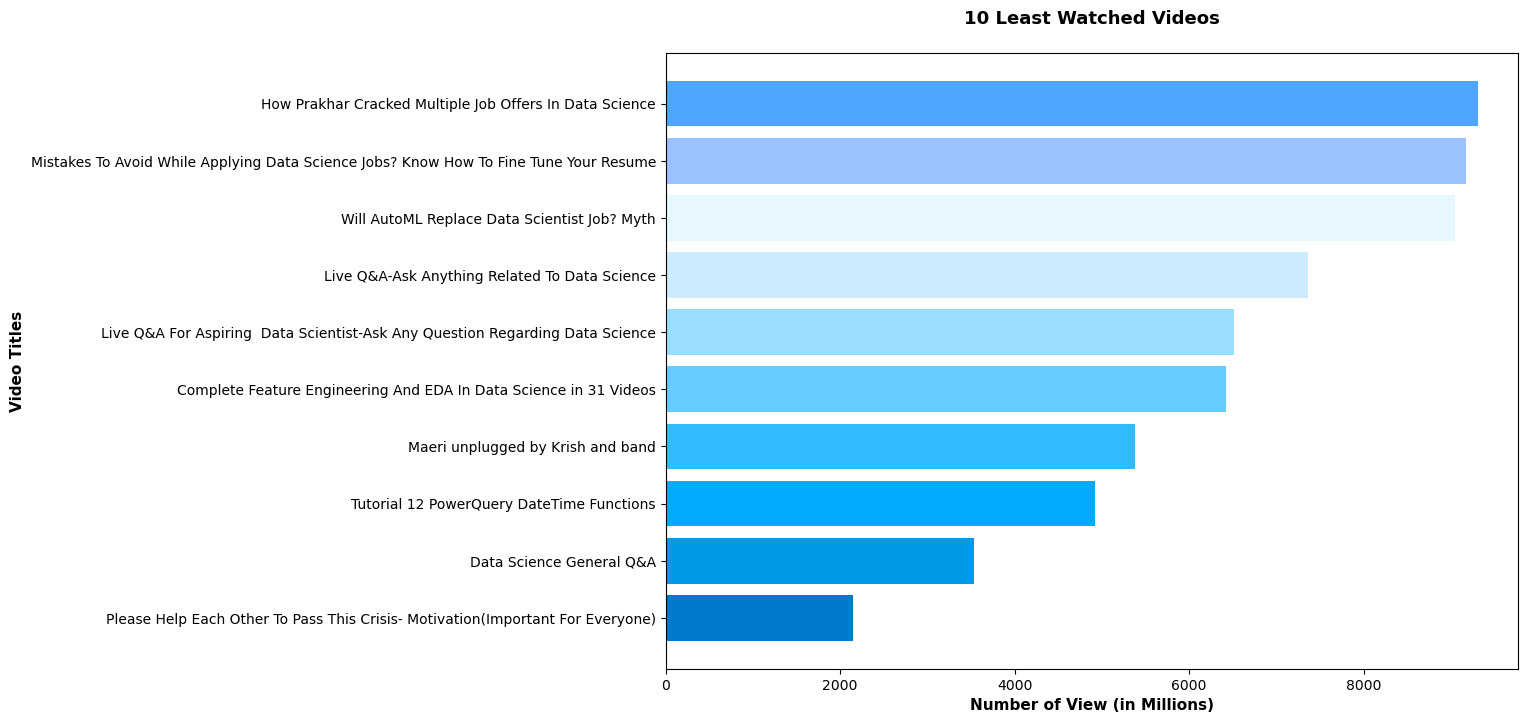

In [20]:
colors_lwv =['#007acc', '#0099e6', '#00aaff', '#33bbff', '#66ccff', '#99ddff','#ccebff', '#e6f7ff', '#99c2ff', '#4da6ff']
plt.figure(figsize=(11, 8))
plt.barh(bottom_10_least_viewed_videos['Title'],bottom_10_least_viewed_videos['View'], color=colors_lwv)
plt.xlabel('Number of View (in Millions)',fontsize=11,fontweight='bold')
plt.ylabel('Video Titles',fontsize=11,fontweight='bold')
plt.title('10 Least Watched Videos\n',fontsize=13, fontweight='bold')
plt.show()

In [21]:
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

filelar = df.nlargest(10, "Like" )[['Title','Like']]
filelar

,Title,Like
29,Statistics- What is Pearson Correlation Coeffi...,5305
6,"Live Day 2- Discussing Ridge, Lasso And Logist...",4593
31,Deploy Machine Learning Model using Flask,4303
26,Salary Of Data Scientist In India And US In 2020,4233
25,Tutorial 39- Gini Impurity Intuition In Depth ...,2840
32,Natural Language Processing|BagofWords,1912
4,"Live Day 2- Bag Of Words, TF-IDF, Word2Vec NLP...",1704
13,Introduction To Machine Learning And Deep Lear...,1580
30,Complete Life Cycle of a Data Science Project,1533
20,Live-Features Selection-Various Techniques To ...,1525


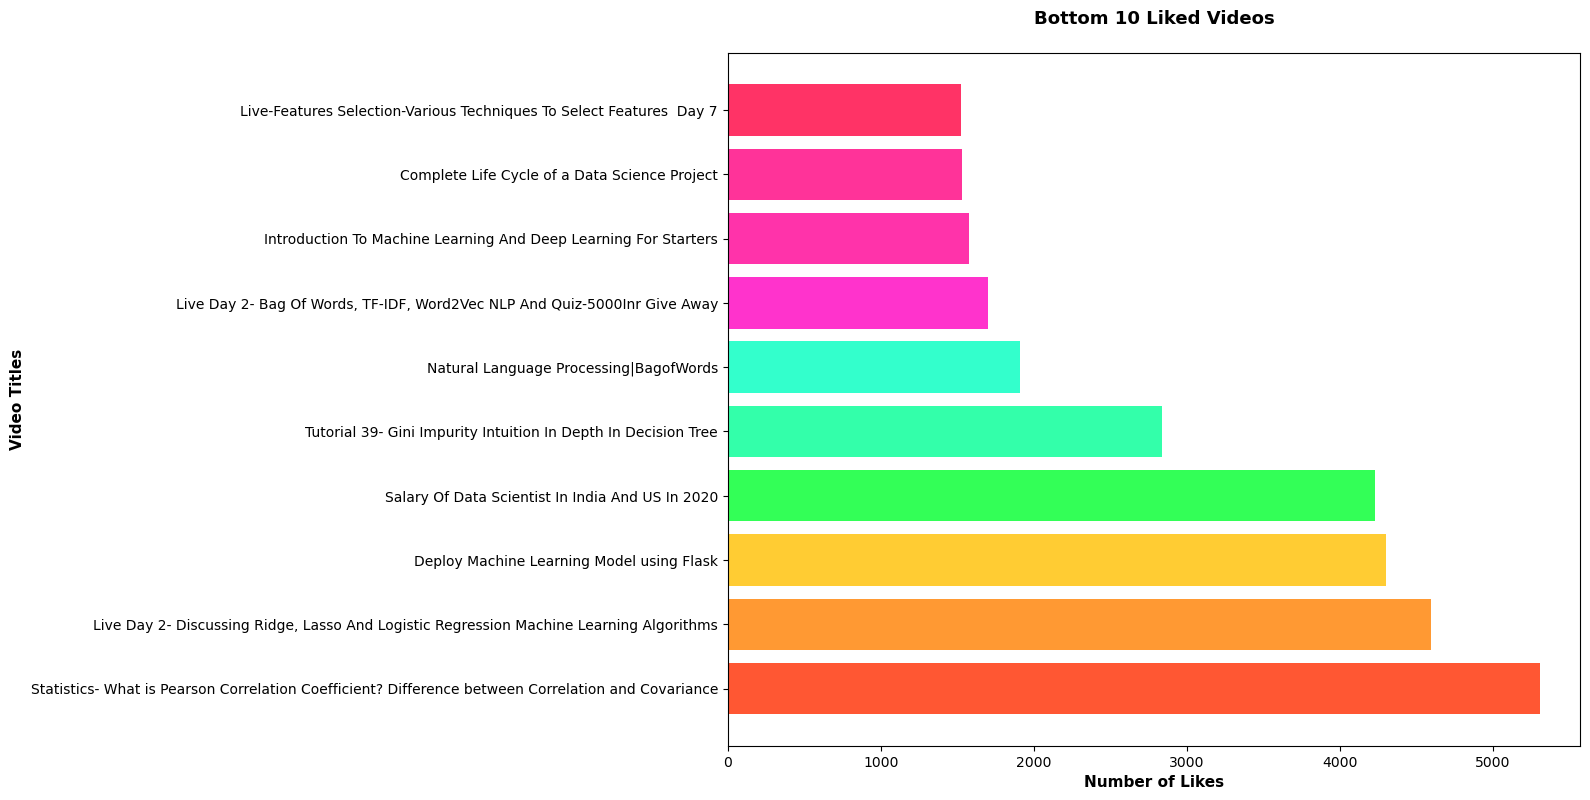

In [22]:
colors_blv = ['#ff5733', '#ff9933', '#ffcc33', '#33ff57', '#33ffaa', '#33ffcc','#ff33cc', '#ff33aa', '#ff3399', '#ff3366']
plt.figure(figsize=(11, 9))
plt.barh(filelar['Title'], filelar['Like'],color=colors_blv)
plt.xlabel('Number of Likes',fontsize=11,fontweight='bold')
plt.ylabel('Video Titles',fontsize=11,fontweight='bold')
plt.title('Bottom 10 Liked Videos\n',fontsize=13, fontweight='bold')
plt.show()


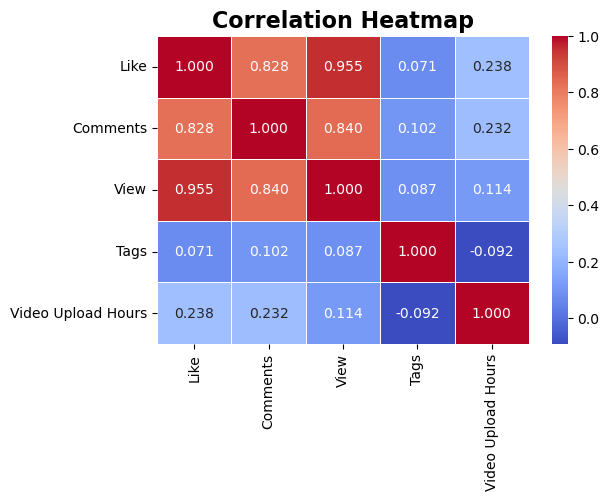

In [23]:
correlation_matrix = df[['Like', 'Comments', 'View','Tags','Video Upload Hours']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f',linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

In [24]:
def Channel_stats(df):
    total_dislikes=df['Dislike'].sum()
    total_views=df['View'].sum()
    total_likes=df['Like'].sum()
    total_comments=df['Comments'].sum()
    print(f'Total dislikes on the videos: {total_dislikes}')
    print(f'Total likes on the videos: {total_likes}')
    print(f'Total Views on the channel: {total_views}')
    print(f'Total comments on the videos: {total_comments}')
Channel_stats(df)


Total dislikes on the videos: 0
Total likes on the videos: 40632
Total Views on the channel: 1652435
Total comments on the videos: 2059


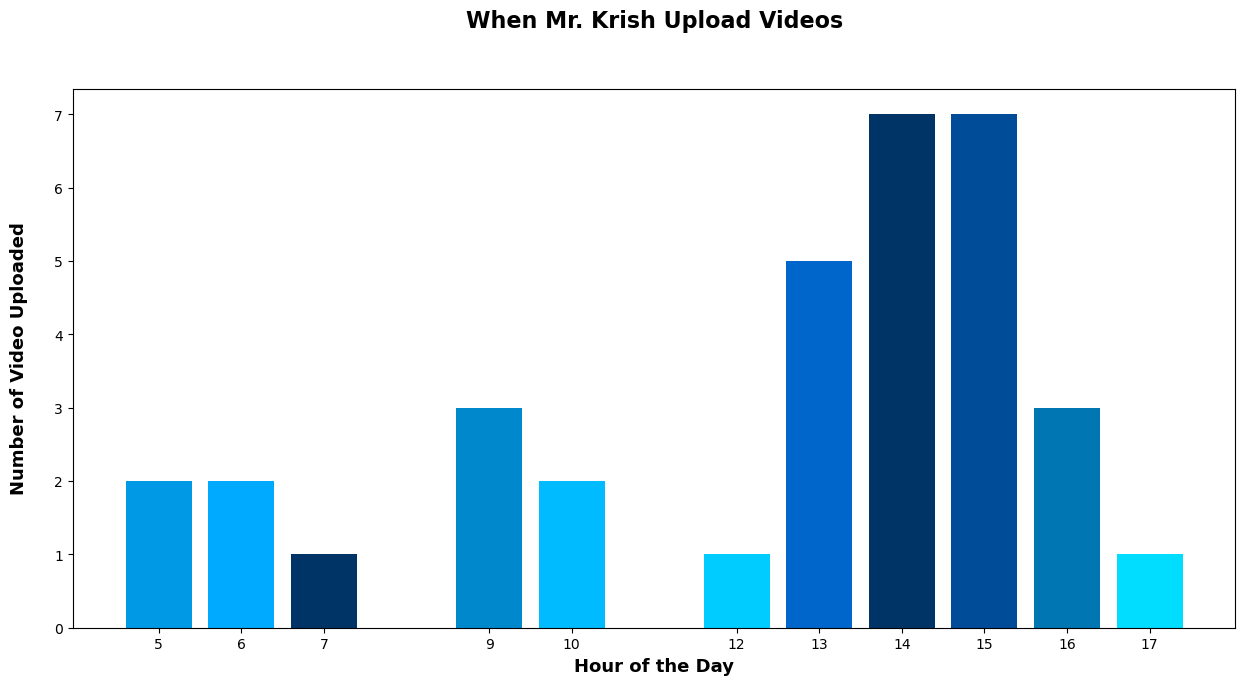

In [25]:
color_muvh = ['#003366', '#004c99', '#0066cc', '#0077b3', '#0088cc', '#0099e6','#00aaff', '#00bbff', '#00ccff', '#00ddff']
most_used_hours=df['Video Upload Hours'].value_counts()
plt.figure(figsize=(15, 7))
plt.bar(most_used_hours.index, most_used_hours.values, color=color_muvh)
plt.xlabel('Hour of the Day', fontsize=13,fontweight='bold')
plt.ylabel('Number of Video Uploaded\n',fontsize=13,fontweight='bold')
plt.title('When Mr. Krish Upload Videos\n \n',fontsize=16, fontweight='bold')
plt.xticks(most_used_hours.index)
plt.show()


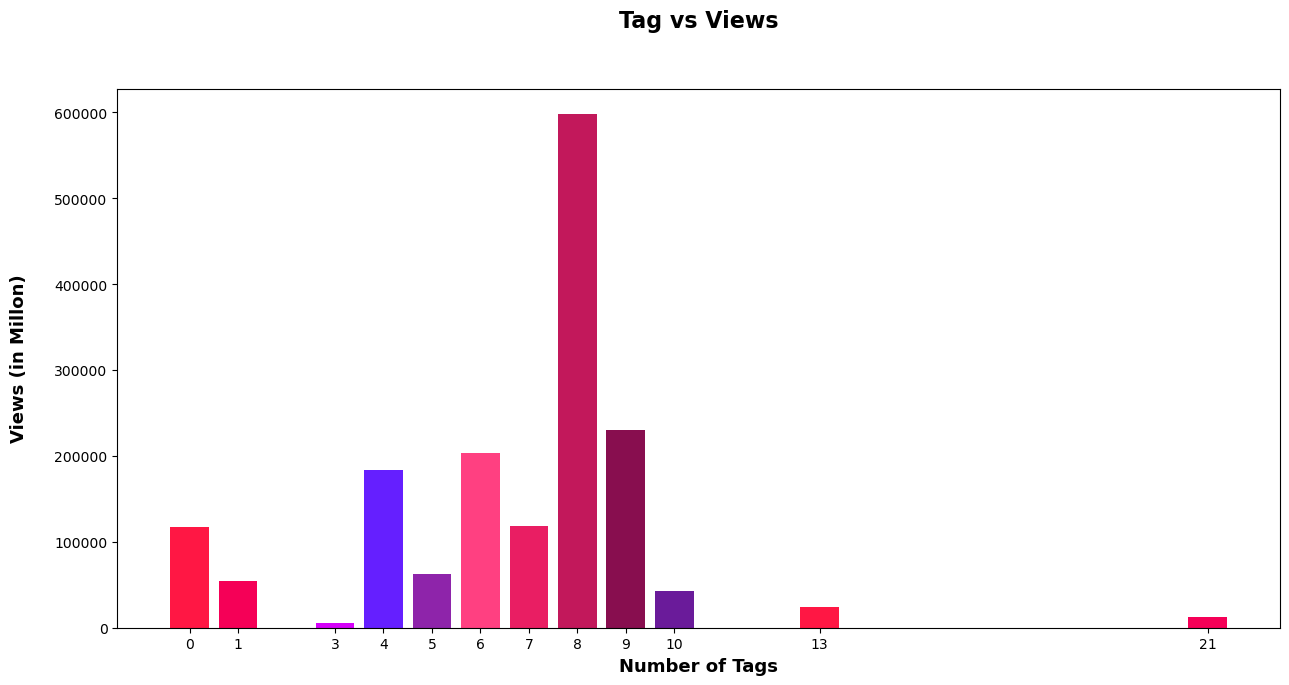

In [26]:
colors_tvv =['#FF1744', '#F50057', '#D500F9', '#651FFF', '#8E24AA', '#FF4081','#E91E63', '#C2185B', '#880E4F', '#6A1B9A']
tag_vs_view=df.groupby('Tags')['View'].sum()
plt.figure(figsize=(15, 7))
plt.bar(tag_vs_view.index, tag_vs_view.values, color=colors_tvv)
plt.xlabel('Number of Tags', fontsize=13,fontweight='bold')
plt.ylabel('Views (in Millon)\n',fontsize=13,fontweight='bold')
plt.title('Tag vs Views\n \n',fontsize=16, fontweight='bold')
plt.xticks(tag_vs_view.index)
plt.show()

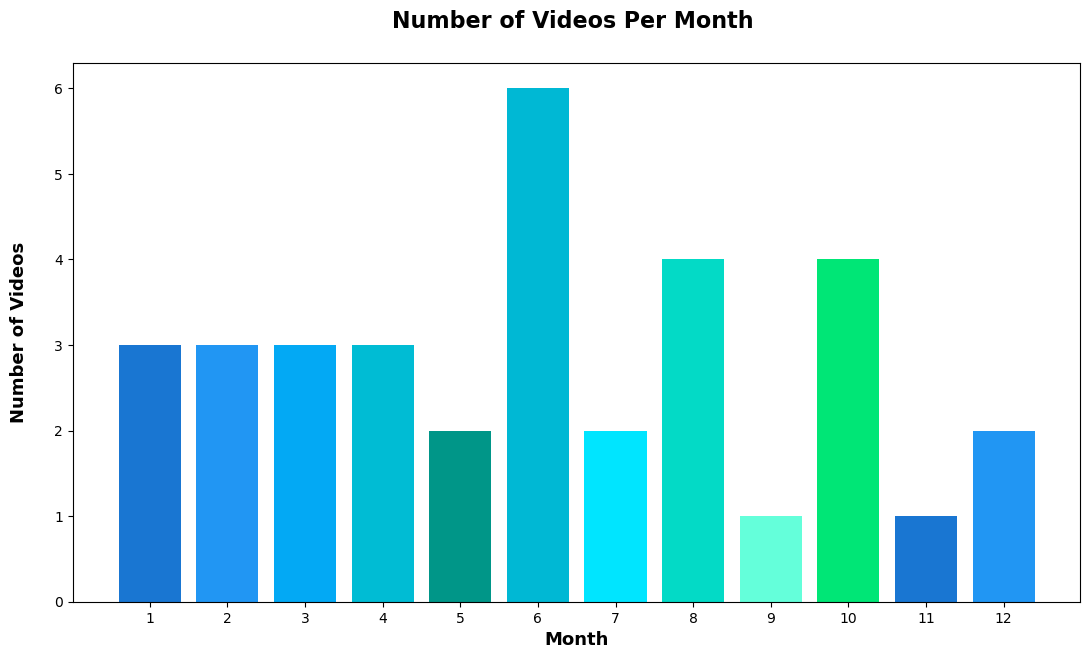

In [27]:
videos_per_month= df.groupby( 'Month').size()
colors = ['#1976D2', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#00B8D4','#00E5FF', '#03DAC6', '#64FFDA', '#00E676']
plt.figure(figsize=(13, 7))
plt.bar(videos_per_month.index, videos_per_month.values, color=colors)
plt.xlabel('Month', fontsize=13,fontweight='bold')
plt.ylabel('Number of Videos\n',fontsize=13,fontweight='bold')
plt.title('Number of Videos Per Month \n',fontsize=16, fontweight='bold')
plt.xticks(videos_per_month.index)
plt.show()

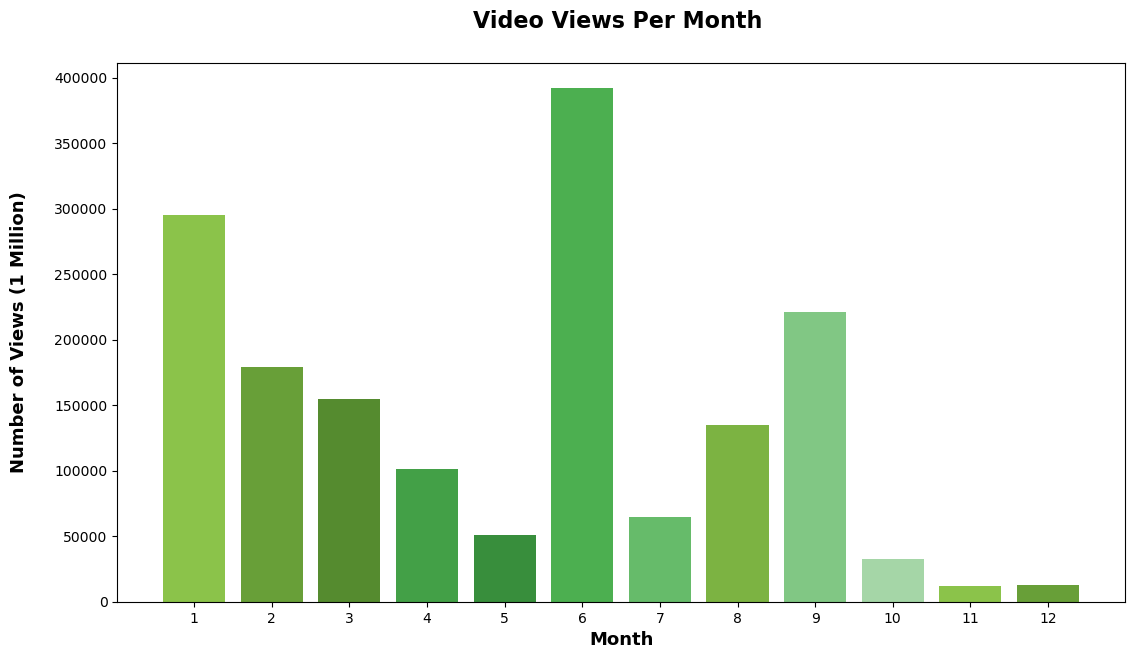

In [28]:
views_per_month = df.groupby( 'Month')['View'].sum()
colors_vpm= ['#8BC34A', '#689F38', '#558B2F', '#43A047', '#388E3C', '#4CAF50','#66BB6A', '#7CB342', '#81C784', '#A5D6A7']
plt.figure(figsize=(13, 7))
plt.bar(views_per_month.index, views_per_month.values, color=colors_vpm)
plt.xlabel('Month', fontsize=13,fontweight='bold')
plt.ylabel('Number of Views (1 Million)\n',fontsize=13,fontweight='bold')
plt.title('Video Views Per Month \n',fontsize=16, fontweight='bold')
plt.xticks(views_per_month.index)
plt.show()

In [29]:
def Performance_check(df):
    df['Performance'] = 'Not Good'
    df.loc[df['View'] >= 50000, 'Performance'] = 'Good Performed'
    df.loc[(df['View'] < 50000) & (df['View'] >= 30000), 'Performance'] = 'Average Performed'
    df.loc[df['View'] < 30000, 'Performance'] = 'Poor Performed'
Performance_check(df)

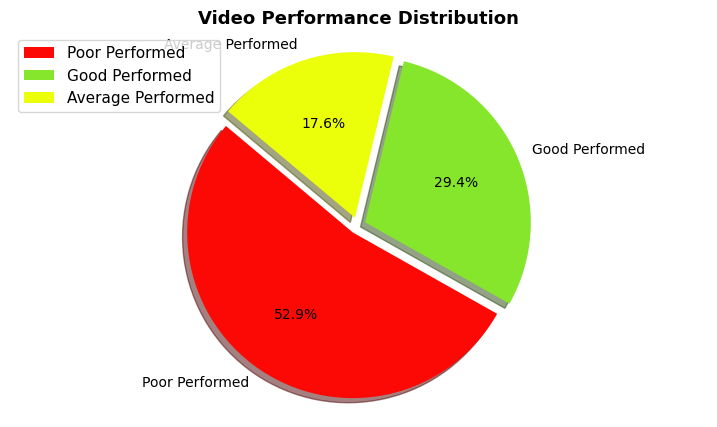

In [30]:
performance_counts = df['Performance'].value_counts()
explode = (0.05, 0.05, 0.05)
colors = ['#fc0905', '#85e62c','#ebff0a']
plt.figure(figsize=(9, 5))
plt.pie(performance_counts, labels=performance_counts.index, autopct='%1.1f%%',startangle=140,
explode=explode, colors=colors, shadow=True)
plt.title('Video Performance Distribution',fontsize=13,fontweight='bold')
plt.axis('equal')
plt.legend(loc="best", labels=performance_counts.index,fontsize=11)
plt.show()

In [31]:
YT_earnings=round((df['View'].sum()/1000)*0.6,2)
print(f'Estimate total earning From this YouTube channel is ${YT_earnings}')

Estimate total earning From this YouTube channel is $991.46
